In [1]:
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
from pandas import DataFrame, Series
import datetime

In [7]:
def process_data(data_set):
    start = datetime.datetime(2005, 1, 1)
    end = datetime.datetime(2020, 1, 1)
    
    all_data = {}
    for ticker in data_set:
        all_data[ticker] = pdr.get_data_yahoo(ticker, start, end)
    
    Adj_close = DataFrame({tic: data['Adj Close'] for tic, data in all_data.items()})
    High = DataFrame({tic: data['High'] for tic, data in all_data.items()})
    Low = DataFrame({tic: data['Low'] for tic, data in all_data.items()})
    Close = DataFrame({tic: data['Close'] for tic, data in all_data.items()})
        
    return Adj_close, High, Low, Close

In [8]:
tickers = ['EWA','EWZ','EWC','FXI', 'EWQ', 'EWG', 'EWH', 'EWI', 'EWJ', 'EWY', 'EWN', 'EWS', 'EZA', 'EWP', 'EWD', 'EWL', 'EWT', 'EWU', 'IVV']

all_data = process_data(tickers)

In [9]:
writer = pd.ExcelWriter('myAssetPool_final.xlsx', engine = 'xlsxwriter')

all_data[0].to_excel(writer, sheet_name = 'Adj_close')
all_data[1].to_excel(writer, sheet_name = 'High')
all_data[2].to_excel(writer, sheet_name = 'Low')
all_data[3].to_excel(writer, sheet_name = 'Close')

writer.save()

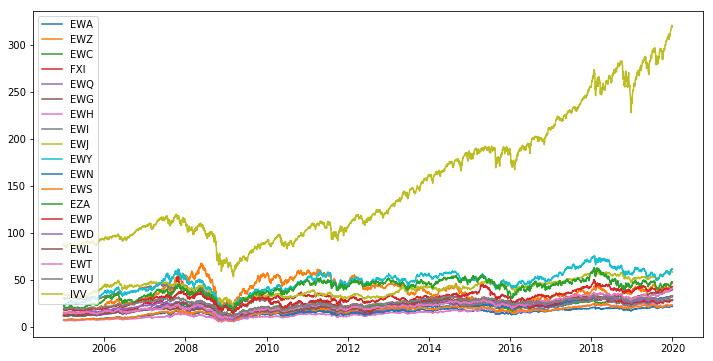

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.plot(all_data[0].index, all_data[0])

plt.legend([tic for tic in all_data[0].columns], loc = 'upper left')

plt.show()